### The purpose of this notebook is to group the agencies into 5 Categories. 

These are the five categories:
1. Public Protection
2. Culture & Recreation	
3. General Administration & Finance	
4. Human Welfare & Neighborhood Development	
5. Public Works, Transportation, and Commerce	

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


In [182]:
oakland = pd.read_csv('oakland_aggregated_data.csv')

In [183]:
oakland

,Department Alias,FY18-19 \nMidcycle Adopted Total,FY19-20 \nBiennial Working Total,FY20-21 \nBiennial Working Total
0,Capital Improvement Projects,66201524.0,102439500.0,92860926.0
1,City Administrator,18912172.0,23722653.0,25178890.0
2,City Attorney,18615221.0,20216139.0,21696825.0
3,City Auditor,2064905.0,2309876.0,2426363.0
4,City Clerk,7259799.0,7523024.0,7386812.0
5,City Council,5522030.0,5987149.0,6121027.0
6,Department of Violence Prevention,1129204.0,1150190.0,1177495.0
7,Economic & Workforce Development,43306380.0,27494517.0,26641463.0
8,Finance Department,777351557.0,842337216.0,875230853.0
9,Fire Department,169822143.0,197596810.0,203370848.0


#### Data Cleaning

In [184]:
###Clean up the data by removing \n

oakland.rename(columns = {'FY18-19 \nMidcycle Adopted Total':'FY18-19 Midcycle Adopted Total', 
                          'FY19-20 \nBiennial Working Total':'FY19-20 Biennial Working Total', 
                          'FY20-21 \nBiennial Working Total':'FY20-21 Biennial Working Total'}, inplace = True) 

In [185]:
oakland

,Department Alias,FY18-19 Midcycle Adopted Total,FY19-20 Biennial Working Total,FY20-21 Biennial Working Total
0,Capital Improvement Projects,66201524.0,102439500.0,92860926.0
1,City Administrator,18912172.0,23722653.0,25178890.0
2,City Attorney,18615221.0,20216139.0,21696825.0
3,City Auditor,2064905.0,2309876.0,2426363.0
4,City Clerk,7259799.0,7523024.0,7386812.0
5,City Council,5522030.0,5987149.0,6121027.0
6,Department of Violence Prevention,1129204.0,1150190.0,1177495.0
7,Economic & Workforce Development,43306380.0,27494517.0,26641463.0
8,Finance Department,777351557.0,842337216.0,875230853.0
9,Fire Department,169822143.0,197596810.0,203370848.0


### Create a new Column titled Agencies by Category

In [186]:

#Create the Public Protection Category
oakland.loc[(oakland['Department Alias'] == 'Race & Equity') | 
            (oakland['Department Alias'] == 'Department of Violence Prevention') |
            (oakland['Department Alias'] == 'Fire Department') |
            (oakland['Department Alias'] == 'Police Commission') |
            (oakland['Department Alias'] == 'Police Department'), 'Agencies by Category'] = 'Public Protection'


#Create the Public Works, Transportation, and Commerce
oakland.loc[(oakland['Department Alias'] == 'Capital Improvement Projects') | 
            (oakland['Department Alias'] == 'Transportation') |
            (oakland['Department Alias'] == 'Economic & Workforce Development') |
            (oakland['Department Alias'] == 'Non') |
            (oakland['Department Alias'] == 'Oakland Public Works'), 'Agencies by Category'] = 'Public Works, Transportation, and Commerce'
    
    
#Create the Human Welfare & Neighborhood Development
oakland.loc[(oakland['Department Alias'] == 'Housing & Community Development') | 
            (oakland['Department Alias'] == 'Human Services'), #called human services instead of human rights commission
             'Agencies by Category'] = 'Human Welfare & Neighborhood Development'

#Create Culture & Recreation
oakland.loc[(oakland['Department Alias'] == 'Oakland Public Library') | 
            (oakland['Department Alias'] == 'Oakland Parks, Recreation & Youth Development'), 
            'Agencies by Category'] = 'Culture & Recreation'
    
        
#Create General Administration & Finance
oakland.loc[(oakland['Department Alias'] == 'City Council') | 
            (oakland['Department Alias'] == 'City Administrator') |
            (oakland['Department Alias'] == 'City Attorney') |
            (oakland['Department Alias'] == 'City Auditor') |
            (oakland['Department Alias'] == 'City Clerk') |
            (oakland['Department Alias'] == 'Planning & Building') |
            (oakland['Department Alias'] == 'Public Ethics Commission') |
            (oakland['Department Alias'] == 'Finance Department') |
            (oakland['Department Alias'] == 'Human Resources Management Department') |
            (oakland['Department Alias'] == 'Information Technology') |
            (oakland['Department Alias'] == 'Mayor'),
            'Agencies by Category'] = 'General Administration & Finance'


    
    
    
    
    
    
    
    
    
    
    

In [187]:
oakland

,Department Alias,FY18-19 Midcycle Adopted Total,FY19-20 Biennial Working Total,FY20-21 Biennial Working Total,Agencies by Category
0,Capital Improvement Projects,66201524.0,102439500.0,92860926.0,"Public Works, Transportation, and Commerce"
1,City Administrator,18912172.0,23722653.0,25178890.0,General Administration & Finance
2,City Attorney,18615221.0,20216139.0,21696825.0,General Administration & Finance
3,City Auditor,2064905.0,2309876.0,2426363.0,General Administration & Finance
4,City Clerk,7259799.0,7523024.0,7386812.0,General Administration & Finance
5,City Council,5522030.0,5987149.0,6121027.0,General Administration & Finance
6,Department of Violence Prevention,1129204.0,1150190.0,1177495.0,Public Protection
7,Economic & Workforce Development,43306380.0,27494517.0,26641463.0,"Public Works, Transportation, and Commerce"
8,Finance Department,777351557.0,842337216.0,875230853.0,General Administration & Finance
9,Fire Department,169822143.0,197596810.0,203370848.0,Public Protection


In [188]:
oakland.to_csv('oak_aggregation.csv')

### Aggregation of the data into the Agency Categories. This is done by summation.

In [189]:
agencies = oakland.groupby(['Agencies by Category'])[['FY18-19 Midcycle Adopted Total', 
                                                 'FY19-20 Biennial Working Total',
                                                 'FY20-21 Biennial Working Total']].agg('sum')

In [190]:
agencies

,FY18-19 Midcycle Adopted Total,FY19-20 Biennial Working Total,FY20-21 Biennial Working Total
Agencies by Category,,,
Culture & Recreation,1.090949e+08,1.200622e+08,1.279472e+08
General Administration & Finance,9.778795e+08,1.080197e+09,1.114219e+09
Human Welfare & Neighborhood Development,2.548599e+08,3.209873e+08,2.886949e+08
Public Protection,4.747248e+08,5.317411e+08,5.492250e+08
"Public Works, Transportation, and Commerce",1.151739e+09,1.259457e+09,1.224018e+09


In [191]:
import seaborn as sns

agencies.to_csv('oak_agencies.csv')

In [192]:
agencies.index

Index(['Culture & Recreation', 'General Administration & Finance',
       'Human Welfare & Neighborhood Development', 'Public Protection',
       'Public Works, Transportation, and Commerce'],
      dtype='object', name='Agencies by Category')

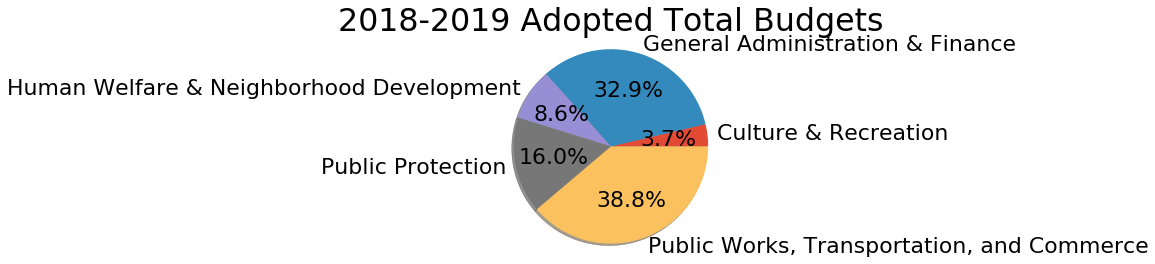

In [193]:
#2018-2019
amt = agencies['FY18-19 Midcycle Adopted Total']
labels = agencies.index
fig, ax1 = plt.subplots()
ax1.pie(amt, labels=labels, shadow=True, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('2018-2019 Adopted Total Budgets')
plt.show()

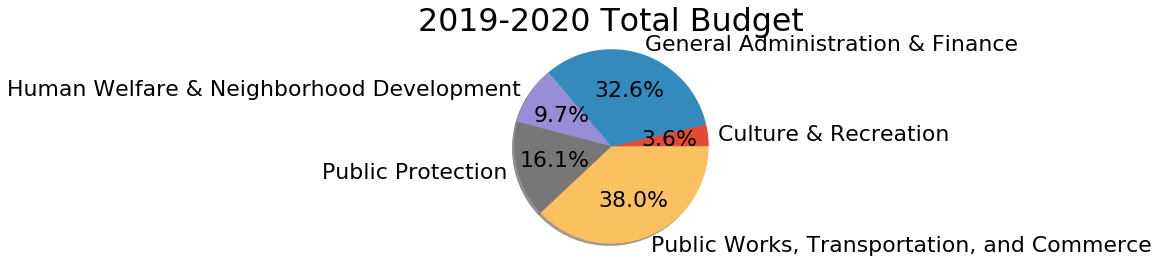

In [194]:
#2019-2020
amt = agencies['FY19-20 Biennial Working Total']
labels = agencies.index
fig, ax1 = plt.subplots()
ax1.pie(amt, labels=labels, shadow=True, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('2019-2020 Total Budget')
plt.show()

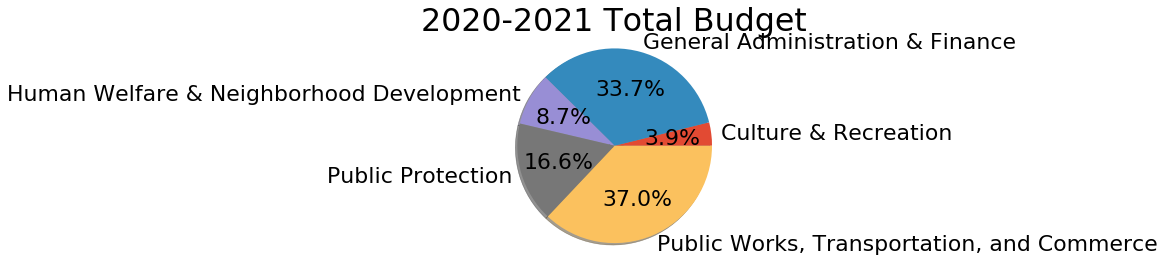

In [195]:
#2019-2020
amt = agencies['FY20-21 Biennial Working Total']
labels = agencies.index
fig, ax1 = plt.subplots()
ax1.pie(amt, labels=labels, shadow=True, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('2020-2021 Total Budget')
plt.show()

In [196]:
df_transp = agencies.T

In [197]:
df_transp

Agencies by Category,Culture & Recreation,General Administration & Finance,Human Welfare & Neighborhood Development,Public Protection,"Public Works, Transportation, and Commerce"
FY18-19 Midcycle Adopted Total,109094892.0,9.778795e+08,254859926.0,474724776.0,1.151739e+09
FY19-20 Biennial Working Total,120062164.0,1.080197e+09,320987327.0,531741082.0,1.259457e+09
FY20-21 Biennial Working Total,127947193.0,1.114219e+09,288694941.0,549225007.0,1.224018e+09


In [198]:
df_transp['Year'] = df_transp.index

In [199]:
years = df_transp['Year']



In [200]:
df_transp

Agencies by Category,Culture & Recreation,General Administration & Finance,Human Welfare & Neighborhood Development,Public Protection,"Public Works, Transportation, and Commerce",Year
FY18-19 Midcycle Adopted Total,109094892.0,9.778795e+08,254859926.0,474724776.0,1.151739e+09,FY18-19 Midcycle Adopted Total
FY19-20 Biennial Working Total,120062164.0,1.080197e+09,320987327.0,531741082.0,1.259457e+09,FY19-20 Biennial Working Total
FY20-21 Biennial Working Total,127947193.0,1.114219e+09,288694941.0,549225007.0,1.224018e+09,FY20-21 Biennial Working Total


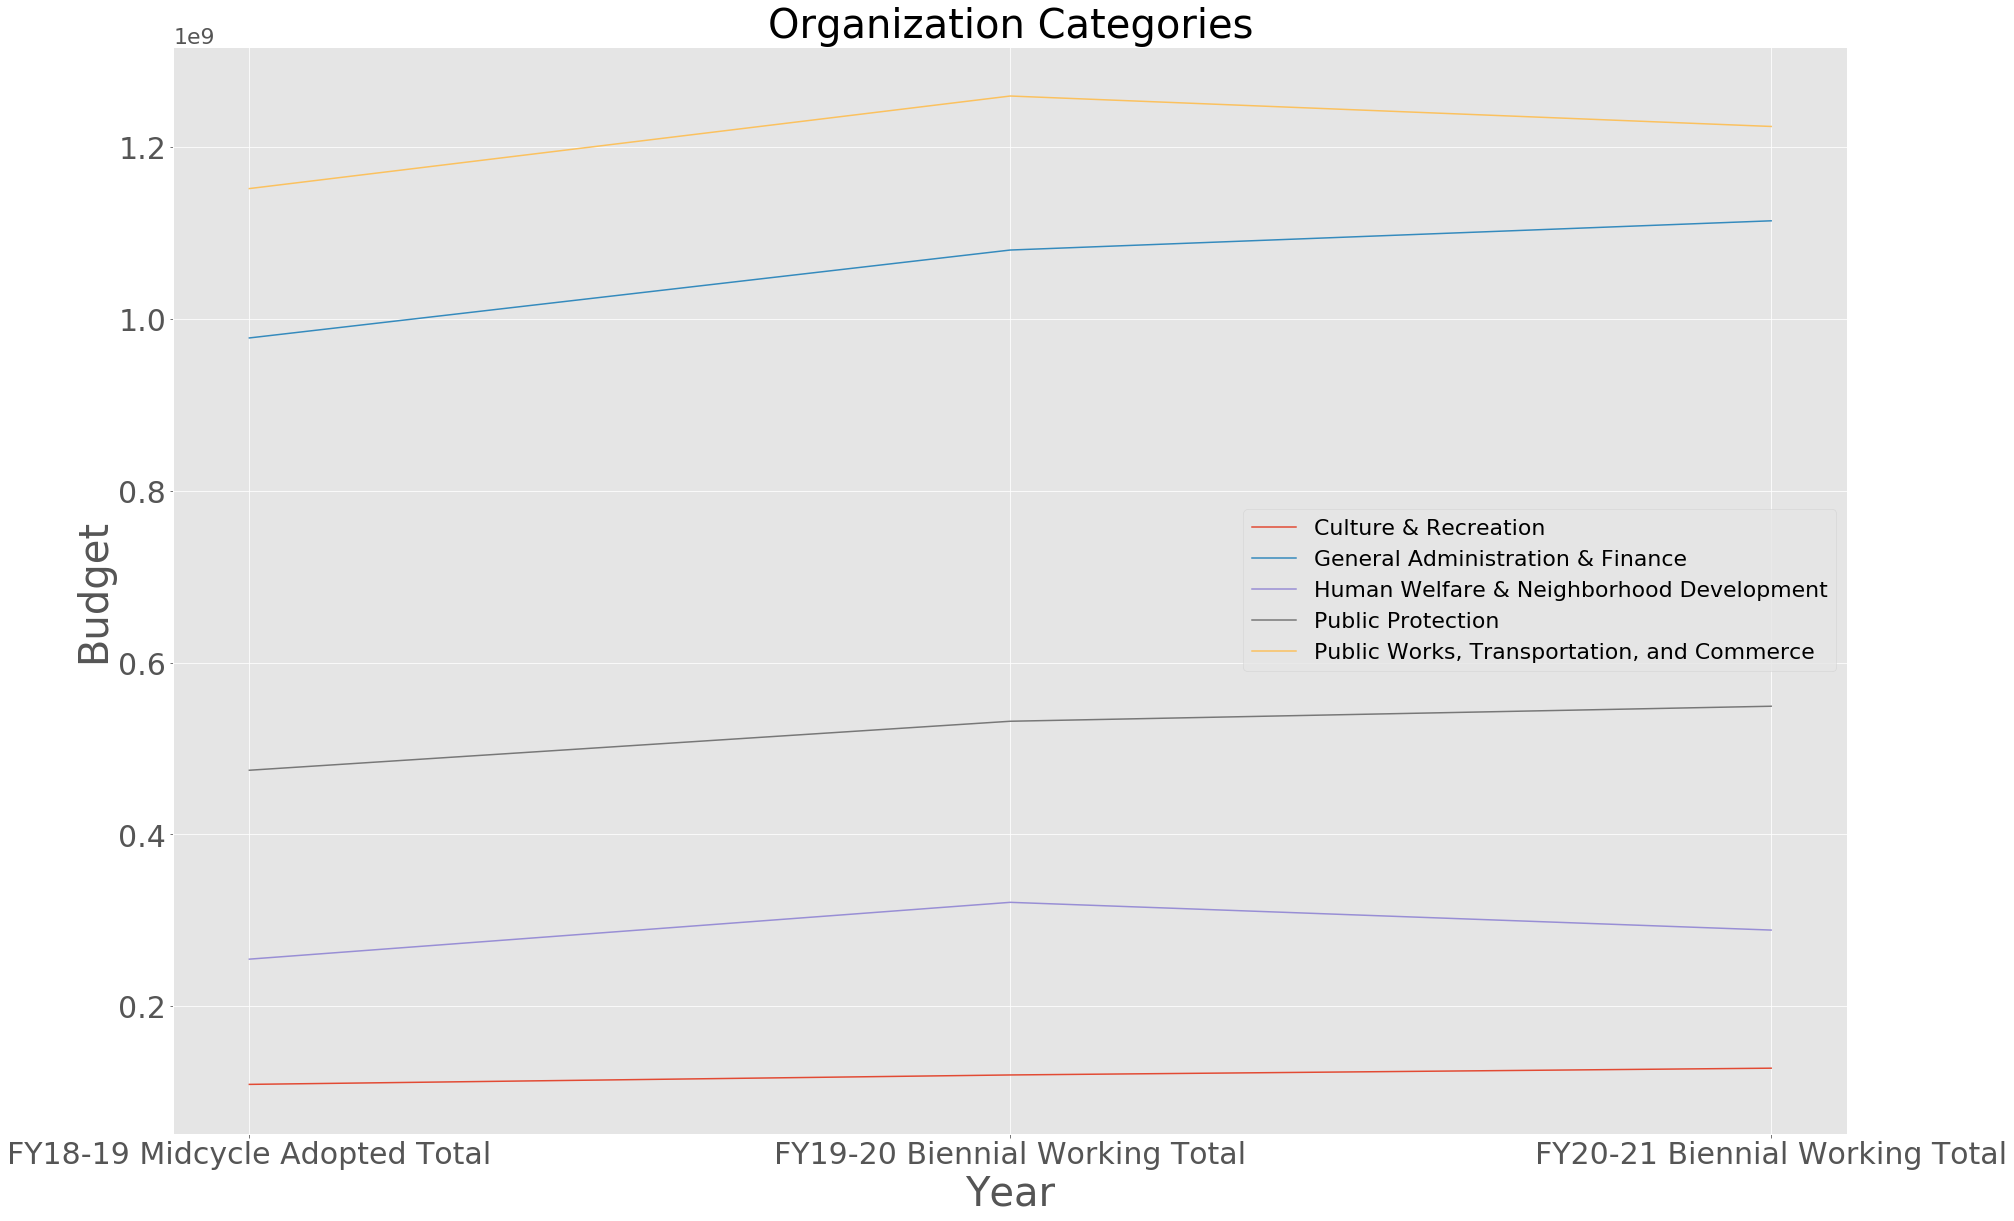

In [201]:

plt.figure(figsize=(30,20))
plt.rcParams.update({'font.size': 22})
plt.title('Organization Categories', fontsize=40)
plt.xlabel('Year', fontsize=40)
plt.ylabel('Budget', fontsize = 40)
plt.tick_params(axis='both', which='major', labelsize=30)

cul = 'Culture & Recreation'
plt.plot(years, np.array(df_transp[cul]),
         label=cul)

gen='General Administration & Finance'
plt.plot(years, np.array(df_transp[gen]), 
         label=gen)

hum='Human Welfare & Neighborhood Development'
plt.plot(years, np.array(df_transp[hum]), 
         label=hum)

protec='Public Protection'
plt.plot(years, np.array(df_transp[protec]),
         label=protec)

commerce = 'Public Works, Transportation, and Commerce'
plt.plot(years, np.array(df_transp[commerce]),
         label=commerce)
plt.legend()
plt.show()

In [22]:
agencies

,FY18-19 Midcycle Adopted Total,FY19-20 Biennial Working Total,FY20-21 Biennial Working Total
Agencies by Category,,,
Culture & Recreation,1.090949e+08,1.200622e+08,1.279472e+08
General Administration & Finance,9.778795e+08,1.080197e+09,1.114219e+09
Human Welfare & Neighborhood Development,2.548599e+08,3.209873e+08,2.886949e+08
Public Protection,4.747248e+08,5.317411e+08,5.492250e+08
"Public Works, Transportation, and Commerce",1.151739e+09,1.259457e+09,1.224018e+09


In [23]:
agencies['FY20-21 Biennial Working Total']

Agencies by Category
Culture & Recreation                          1.279472e+08
General Administration & Finance              1.114219e+09
Human Welfare & Neighborhood Development      2.886949e+08
Public Protection                             5.492250e+08
Public Works, Transportation, and Commerce    1.224018e+09
Name: FY20-21 Biennial Working Total, dtype: float64

### Now we will look at Public Protection more closely. 
These five divisions are:
1. Race & Equity
2. Department of Violence Prevention
3. Fire Department
4. Police Comission
5. Police Department

In [80]:
subset = oakland[oakland['Agencies by Category'] == 'Public Protection'] 

In [24]:
oakland.head()

,Department Alias,FY18-19 Midcycle Adopted Total,FY19-20 Biennial Working Total,FY20-21 Biennial Working Total,Agencies by Category
0,Capital Improvement Projects,66201524.0,102439500.0,92860926.0,"Public Works, Transportation, and Commerce"
1,City Administrator,18912172.0,23722653.0,25178890.0,General Administration & Finance
2,City Attorney,18615221.0,20216139.0,21696825.0,General Administration & Finance
3,City Auditor,2064905.0,2309876.0,2426363.0,General Administration & Finance
4,City Clerk,7259799.0,7523024.0,7386812.0,General Administration & Finance


In [81]:
subset

,Department Alias,FY18-19 Midcycle Adopted Total,FY19-20 Biennial Working Total,FY20-21 Biennial Working Total,Agencies by Category
6,Department of Violence Prevention,1129204.0,1150190.0,1177495.0,Public Protection
9,Fire Department,169822143.0,197596810.0,203370848.0,Public Protection
20,Police Commission,2963773.0,4101998.0,4320062.0,Public Protection
21,Police Department,300247481.0,328154169.0,339597289.0,Public Protection
23,Race & Equity,562175.0,737915.0,759313.0,Public Protection


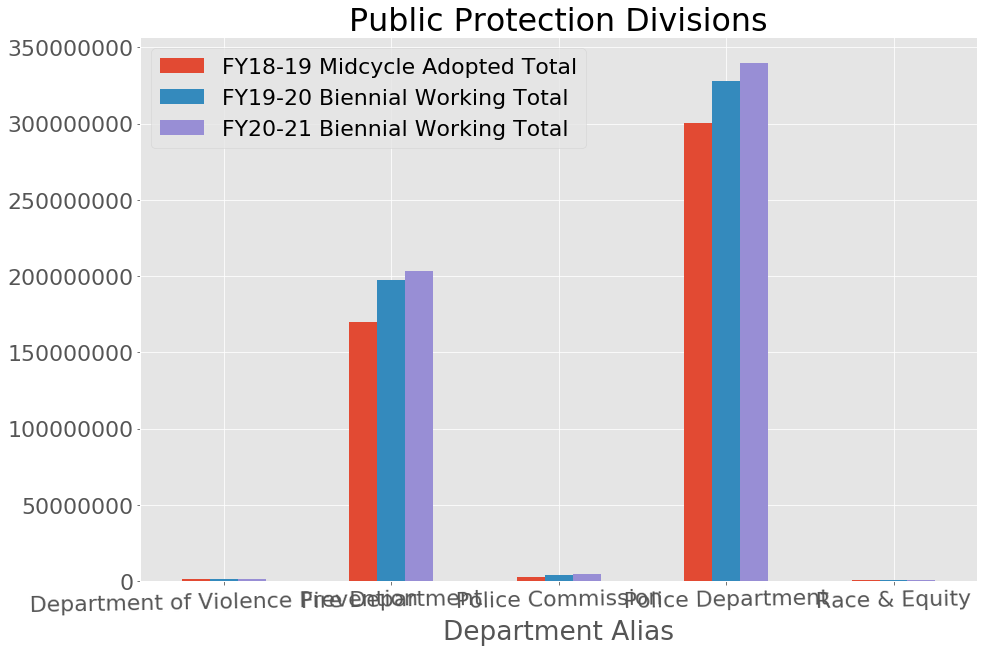

In [82]:
fig = plt.figure(figsize=(6,6))
ax = plt.gca() 

ax.set_title(label='Public Protection Divisions') # Title

subset.plot(x='Department Alias', 
             y=['FY18-19 Midcycle Adopted Total', 
                'FY19-20 Biennial Working Total', 
                'FY20-21 Biennial Working Total'], 
             kind='bar',
            figsize=(15,10),
            rot=True,
            ax=ax,
           title='Public Protection Divisions')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [83]:
subset.index = subset['Department Alias']

In [84]:
subset

,Department Alias,FY18-19 Midcycle Adopted Total,FY19-20 Biennial Working Total,FY20-21 Biennial Working Total,Agencies by Category
Department Alias,,,,,
Department of Violence Prevention,Department of Violence Prevention,1129204.0,1150190.0,1177495.0,Public Protection
Fire Department,Fire Department,169822143.0,197596810.0,203370848.0,Public Protection
Police Commission,Police Commission,2963773.0,4101998.0,4320062.0,Public Protection
Police Department,Police Department,300247481.0,328154169.0,339597289.0,Public Protection
Race & Equity,Race & Equity,562175.0,737915.0,759313.0,Public Protection


In [85]:
#remove the agencies by category column
subset = subset.drop('Agencies by Category', axis=1)

In [86]:
#transpose the dataframe
df_transp = subset.T

#put years in its own column
df_transp['Year'] = df_transp.index


In [87]:
#remove duplicated row
df_transp = df_transp.drop('Department Alias')

In [88]:
df_transp

Department Alias,Department of Violence Prevention,Fire Department,Police Commission,Police Department,Race & Equity,Year
FY18-19 Midcycle Adopted Total,1.1292e+06,1.69822e+08,2.96377e+06,3.00247e+08,562175,FY18-19 Midcycle Adopted Total
FY19-20 Biennial Working Total,1.15019e+06,1.97597e+08,4.102e+06,3.28154e+08,737915,FY19-20 Biennial Working Total
FY20-21 Biennial Working Total,1.1775e+06,2.03371e+08,4.32006e+06,3.39597e+08,759313,FY20-21 Biennial Working Total


In [89]:
subset.index = subset['Department Alias']

In [90]:
df_transp

Department Alias,Department of Violence Prevention,Fire Department,Police Commission,Police Department,Race & Equity,Year
FY18-19 Midcycle Adopted Total,1.1292e+06,1.69822e+08,2.96377e+06,3.00247e+08,562175,FY18-19 Midcycle Adopted Total
FY19-20 Biennial Working Total,1.15019e+06,1.97597e+08,4.102e+06,3.28154e+08,737915,FY19-20 Biennial Working Total
FY20-21 Biennial Working Total,1.1775e+06,2.03371e+08,4.32006e+06,3.39597e+08,759313,FY20-21 Biennial Working Total


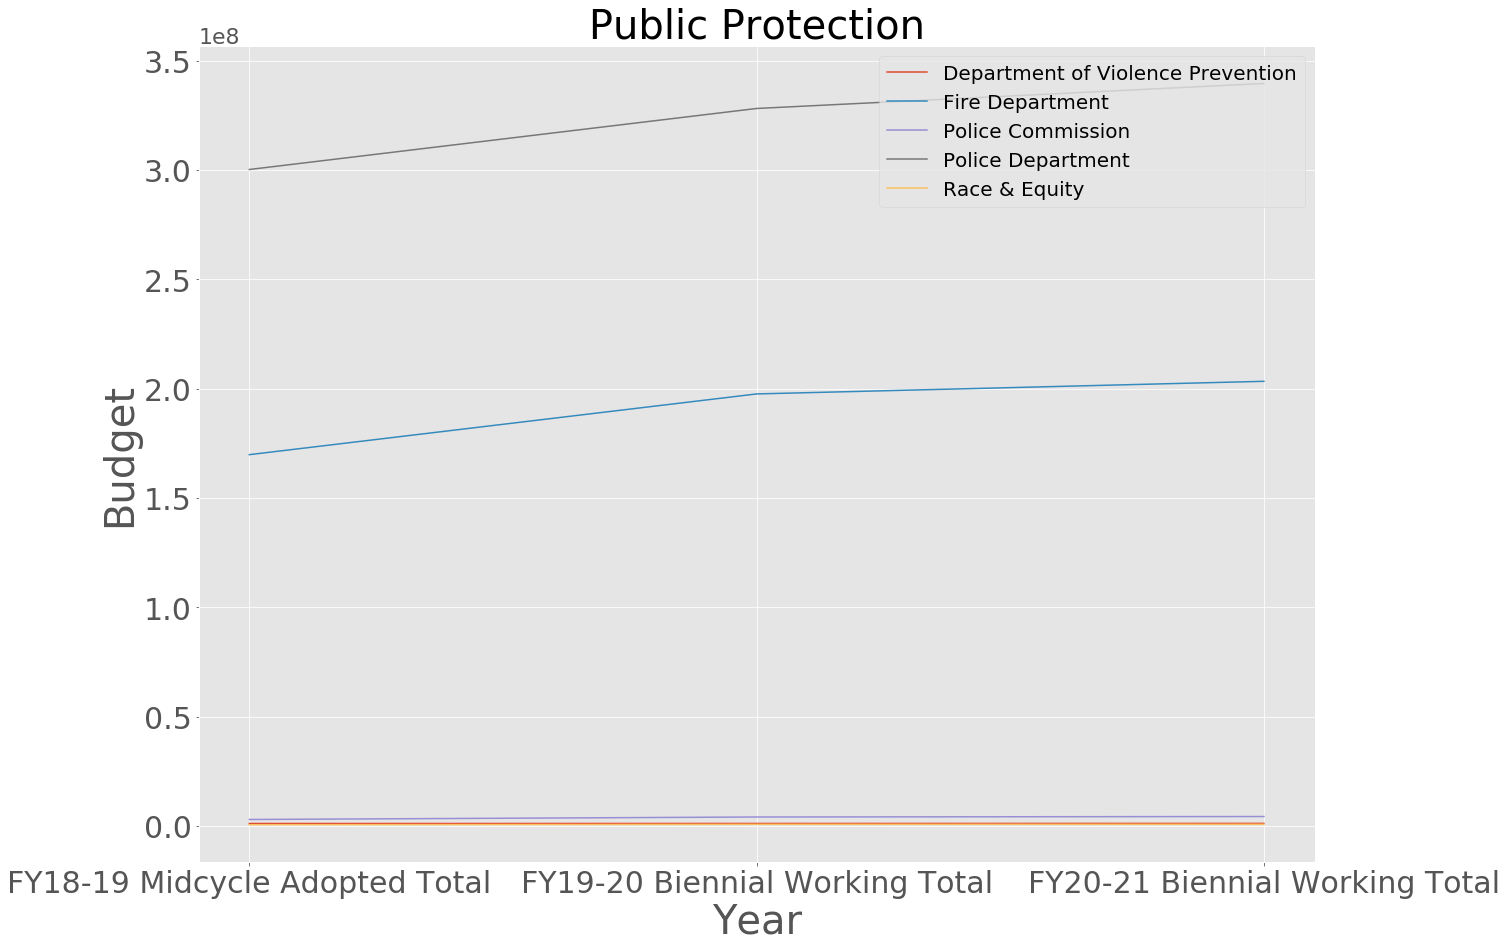

In [91]:
years = df_transp['Year']

plt.figure(figsize=(20,15))
plt.rcParams.update({'font.size': 22})
plt.title('Public Protection', fontsize=40)
plt.xlabel('Year', fontsize=40)
plt.ylabel('Budget', fontsize = 40)
plt.tick_params(axis='both', which='major', labelsize=30)

vio = 'Department of Violence Prevention'
plt.plot(years, np.array(df_transp[vio]),
         label=vio)

fire = 'Fire Department'
plt.plot(years, np.array(df_transp[fire]),
         label=fire)

pol_c='Police Commission'
plt.plot(years, np.array(df_transp[pol_c]), 
         label=pol_c)

pol_d='Police Department'
plt.plot(years, np.array(df_transp[pol_d]), 
         label=pol_d)

race='Race & Equity'
plt.plot(years, np.array(df_transp[race]),
         label=race)
plt.legend(prop={'size': 20})
plt.show()

In [129]:
#remove year
df_transp = df_transp.drop(columns=['Year'])

### Looking at percentages of the major categories



In [131]:
#Percent Change
df_transp.pct_change()

Department Alias,Department of Violence Prevention,Fire Department,Police Commission,Police Department,Race & Equity
FY18-19 Midcycle Adopted Total,NaN,NaN,NaN,NaN,NaN
FY19-20 Biennial Working Total,0.018585,0.163552,0.384046,0.092946,0.312607
FY20-21 Biennial Working Total,0.023740,0.029221,0.053160,0.034871,0.028998


In [171]:
#Create smaller dataframe with percentages added for each year

#2018-2019
fy1819 = oakland[['Department Alias', 'FY18-19 Midcycle Adopted Total', 'Agencies by Category']].copy()
fy1819['18-19 Percent'] = fy1819['FY18-19 Midcycle Adopted Total']/fy1819['FY18-19 Midcycle Adopted Total'].sum() * 100

#2019-2020
fy1920 = oakland[['Department Alias', 'FY19-20 Biennial Working Total', 'Agencies by Category']].copy()
fy1920['19-20 Percent'] = fy1920['FY19-20 Biennial Working Total']/fy1920['FY19-20 Biennial Working Total'].sum() * 100

#2020-2021
fy2021 = oakland[['Department Alias', 'FY20-21 Biennial Working Total', 'Agencies by Category']].copy()
fy2021['20-21 Percent'] = fy2021['FY20-21 Biennial Working Total']/fy2021['FY20-21 Biennial Working Total'].sum() * 100

In [177]:
fy1819[fy1819['Agencies by Category'] == 'Public Protection'].drop(columns='Agencies by Category')

,Department Alias,FY18-19 Midcycle Adopted Total,18-19 Percent
6,Department of Violence Prevention,1129204.0,0.038042
9,Fire Department,169822143.0,5.721197
20,Police Commission,2963773.0,0.099848
21,Police Department,300247481.0,10.115141
23,Race & Equity,562175.0,0.018939


In [178]:
fy1920[fy1920['Agencies by Category'] == 'Public Protection'].drop(columns='Agencies by Category')

,Department Alias,FY19-20 Biennial Working Total,19-20 Percent
6,Department of Violence Prevention,1150190.0,0.034723
9,Fire Department,197596810.0,5.965285
20,Police Commission,4101998.0,0.123836
21,Police Department,328154169.0,9.906705
23,Race & Equity,737915.0,0.022277


In [179]:
fy2021[fy2021['Agencies by Category'] == 'Public Protection'].drop(columns='Agencies by Category')

,Department Alias,FY20-21 Biennial Working Total,20-21 Percent
6,Department of Violence Prevention,1177495.0,0.035637
9,Fire Department,203370848.0,6.155098
20,Police Commission,4320062.0,0.130748
21,Police Department,339597289.0,10.278044
23,Race & Equity,759313.0,0.022981
